In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import neccessary libries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 283)

from sklearn import preprocessing
import matplotlib.pyplot as plt # For ploting 
import seaborn as sns
plt.rc("font", size=14)

from sklearn.utils import shuffle

In [3]:
# Read in dataset
def load_data(file):
    # Read in dataset
    df = pd.read_csv('merged_file_f.csv')
    t_column = [c for c in df.columns if c.startswith('t_')]
    f_columns = [c for c in df.columns if c.startswith('f_')]
    import random
    random.seed(8)
    np.random.seed(8)

    df = shuffle(df)
    x= df[f_columns]
    y= df[t_column]

    return x,y,df

In [4]:
x,y,df = load_data('merged_file_f.csv')

In [54]:
tsne_df = pd.concat([x,y],axis=1)
tsne_df.head()

,f_II__abs_energy,f_II__absolute_sum_of_changes,f_II__agg_autocorrelation__f_agg_mean__maxlag_40,f_II__agg_autocorrelation__f_agg_median__maxlag_40,f_II__agg_autocorrelation__f_agg_var__maxlag_40,f_II__ar_coefficient__k_10__coeff_0,f_II__ar_coefficient__k_10__coeff_1,f_II__ar_coefficient__k_10__coeff_2,f_II__ar_coefficient__k_10__coeff_3,f_II__ar_coefficient__k_10__coeff_4,f_II__autocorrelation__lag_0,f_II__autocorrelation__lag_1,f_II__autocorrelation__lag_2,f_II__autocorrelation__lag_3,f_II__autocorrelation__lag_4,f_II__autocorrelation__lag_5,f_II__autocorrelation__lag_6,f_II__autocorrelation__lag_7,f_II__autocorrelation__lag_8,f_II__autocorrelation__lag_9,f_II__binned_entropy__max_bins_10,f_II__count_above_mean,f_II__count_below_mean,f_II__fft_aggregated__aggtype_centroid,f_II__fft_aggregated__aggtype_kurtosis,f_II__fft_aggregated__aggtype_skew,f_II__fft_aggregated__aggtype_variance,f_II__first_location_of_maximum,f_II__first_location_of_minimum,f_II__kurtosis,f_II__large_standard_deviation__r_0.05,f_II__large_standard_deviation__r_0.1,f_II__large_standard_deviation__r_0.15000000000000002,f_II__large_standard_deviation__r_0.2,f_II__large_standard_deviation__r_0.25,f_II__large_standard_deviation__r_0.30000000000000004,f_II__large_standard_deviation__r_0.35000000000000003,f_II__large_standard_deviation__r_0.4,f_II__large_standard_deviation__r_0.45,f_II__large_standard_deviation__r_0.5,f_II__large_standard_deviation__r_0.55,f_II__large_standard_deviation__r_0.6000000000000001,f_II__large_standard_deviation__r_0.65,f_II__large_standard_deviation__r_0.7000000000000001,f_II__large_standard_deviation__r_0.75,f_II__large_standard_deviation__r_0.8,f_II__large_standard_deviation__r_0.8500000000000001,f_II__large_standard_deviation__r_0.9,f_II__large_standard_deviation__r_0.9500000000000001,f_II__length,f_II__linear_trend__attr_intercept,f_II__linear_trend__attr_pvalue,f_II__linear_trend__attr_rvalue,f_II__linear_trend__attr_slope,f_II__linear_trend__attr_stderr,f_II__longest_strike_above_mean,f_II__longest_strike_below_mean,f_II__max_langevin_fixed_point__m_3__r_30,f_II__maximum,f_II__mean,f_II__median,f_II__minimum,f_II__quantile__q_0.1,f_II__quantile__q_0.2,f_II__quantile__q_0.3,f_II__quantile__q_0.4,f_II__quantile__q_0.6,f_II__quantile__q_0.7,f_II__quantile__q_0.8,f_II__quantile__q_0.9,f_II__skewness,f_II__standard_deviation,f_II__variance,f_PLETH__abs_energy,f_PLETH__absolute_sum_of_changes,f_PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_median__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_var__maxlag_40,f_PLETH__ar_coefficient__k_10__coeff_0,f_PLETH__ar_coefficient__k_10__coeff_1,f_PLETH__ar_coefficient__k_10__coeff_2,f_PLETH__ar_coefficient__k_10__coeff_3,f_PLETH__ar_coefficient__k_10__coeff_4,f_PLETH__autocorrelation__lag_0,f_PLETH__autocorrelation__lag_1,f_PLETH__autocorrelation__lag_2,f_PLETH__autocorrelation__lag_3,f_PLETH__autocorrelation__lag_4,f_PLETH__autocorrelation__lag_5,f_PLETH__autocorrelation__lag_6,f_PLETH__autocorrelation__lag_7,f_PLETH__autocorrelation__lag_8,f_PLETH__autocorrelation__lag_9,f_PLETH__binned_entropy__max_bins_10,f_PLETH__count_above_mean,f_PLETH__count_below_mean,f_PLETH__fft_aggregated__aggtype_centroid,f_PLETH__fft_aggregated__aggtype_kurtosis,f_PLETH__fft_aggregated__aggtype_skew,f_PLETH__fft_aggregated__aggtype_variance,f_PLETH__first_location_of_maximum,f_PLETH__first_location_of_minimum,f_PLETH__kurtosis,f_PLETH__large_standard_deviation__r_0.05,f_PLETH__large_standard_deviation__r_0.1,f_PLETH__large_standard_deviation__r_0.15000000000000002,f_PLETH__large_standard_deviation__r_0.2,f_PLETH__large_standard_deviation__r_0.25,f_PLETH__large_standard_deviation__r_0.30000000000000004,f_PLETH__large_standard_deviation__r_0.35000000000000003,f_PLETH__large_standard_deviation__r_0.4,f_PLETH__large_standard_deviation__r_0.45,f_PLETH__large_standard_deviation__r_0.5,f_PLETH__large_standard_deviation__r_0.55,f_PLETH__large_standard_deviation__r_0.600000000000000

In [5]:
# Display a couple datas 
df.head()

,Unnamed: 0,Unnamed: 0.1,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,EXTRACTED_LENGTH,f_II__abs_energy,f_II__absolute_sum_of_changes,f_II__agg_autocorrelation__f_agg_mean__maxlag_40,f_II__agg_autocorrelation__f_agg_median__maxlag_40,f_II__agg_autocorrelation__f_agg_var__maxlag_40,f_II__ar_coefficient__k_10__coeff_0,f_II__ar_coefficient__k_10__coeff_1,f_II__ar_coefficient__k_10__coeff_2,f_II__ar_coefficient__k_10__coeff_3,f_II__ar_coefficient__k_10__coeff_4,f_II__autocorrelation__lag_0,f_II__autocorrelation__lag_1,f_II__autocorrelation__lag_2,f_II__autocorrelation__lag_3,f_II__autocorrelation__lag_4,f_II__autocorrelation__lag_5,f_II__autocorrelation__lag_6,f_II__autocorrelation__lag_7,f_II__autocorrelation__lag_8,f_II__autocorrelation__lag_9,f_II__binned_entropy__max_bins_10,f_II__count_above_mean,f_II__count_below_mean,f_II__fft_aggregated__aggtype_centroid,f_II__fft_aggregated__aggtype_kurtosis,f_II__fft_aggregated__aggtype_skew,f_II__fft_aggregated__aggtype_variance,f_II__first_location_of_maximum,f_II__first_location_of_minimum,f_II__kurtosis,f_II__large_standard_deviation__r_0.05,f_II__large_standard_deviation__r_0.1,f_II__large_standard_deviation__r_0.15000000000000002,f_II__large_standard_deviation__r_0.2,f_II__large_standard_deviation__r_0.25,f_II__large_standard_deviation__r_0.30000000000000004,f_II__large_standard_deviation__r_0.35000000000000003,f_II__large_standard_deviation__r_0.4,f_II__large_standard_deviation__r_0.45,f_II__large_standard_deviation__r_0.5,f_II__large_standard_deviation__r_0.55,f_II__large_standard_deviation__r_0.6000000000000001,f_II__large_standard_deviation__r_0.65,f_II__large_standard_deviation__r_0.7000000000000001,f_II__large_standard_deviation__r_0.75,f_II__large_standard_deviation__r_0.8,f_II__large_standard_deviation__r_0.8500000000000001,f_II__large_standard_deviation__r_0.9,f_II__large_standard_deviation__r_0.9500000000000001,f_II__length,f_II__linear_trend__attr_intercept,f_II__linear_trend__attr_pvalue,f_II__linear_trend__attr_rvalue,f_II__linear_trend__attr_slope,f_II__linear_trend__attr_stderr,f_II__longest_strike_above_mean,f_II__longest_strike_below_mean,f_II__max_langevin_fixed_point__m_3__r_30,f_II__maximum,f_II__mean,f_II__median,f_II__minimum,f_II__quantile__q_0.1,f_II__quantile__q_0.2,f_II__quantile__q_0.3,f_II__quantile__q_0.4,f_II__quantile__q_0.6,f_II__quantile__q_0.7,f_II__quantile__q_0.8,f_II__quantile__q_0.9,f_II__skewness,f_II__standard_deviation,f_II__variance,f_PLETH__abs_energy,f_PLETH__absolute_sum_of_changes,f_PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_median__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_var__maxlag_40,f_PLETH__ar_coefficient__k_10__coeff_0,f_PLETH__ar_coefficient__k_10__coeff_1,f_PLETH__ar_coefficient__k_10__coeff_2,f_PLETH__ar_coefficient__k_10__coeff_3,f_PLETH__ar_coefficient__k_10__coeff_4,f_PLETH__autocorrelation__lag_0,f_PLETH__autocorrelation__lag_1,f_PLETH__autocorrelation__lag_2,f_PLETH__autocorrelation__lag_3,f_PLETH__autocorrelation__lag_4,f_PLETH__autocorrelation__lag_5,f_PLETH__autocorrelation__lag_6,f_PLETH__autocorrelation__lag_7,f_PLETH__autocorrelation__lag_8,f_PLETH__autocorrelation__lag_9,f_PLETH__binned_entropy__max_bins_10,f_PLETH__count_above_mean,f_PLETH__count_below_mean,f_PLETH__fft_aggregated__aggtype_centroid,f_PLETH__fft_aggregated__aggtype_kurtosis,f_PLETH__fft_aggregated__aggtype_skew,f_PLETH__fft_aggregated__aggtype_variance,f_PLETH__first_location_of_maximum,f_PLETH__first_location_of_minimum,f_PLETH__kurtosis,f_PLETH__large_standard_deviation__r_0.05,f_PLETH__large_standard_deviation__r_0.1,f_PLETH__large_standard_deviation__r_0.15000000000000002,f_PLETH__large_standard_deviation__r_0.2,f_PLETH__large_standard_deviation__r_0.25,f_PLETH__large_standard_deviation__r_0.30000000000000004,f_PLETH__large_standard_deviation__r_0.35000000000000003,f_PLETH__large_standard_deviation__r_0.4,f_PLETH__large_standard_deviation__r_0.45,f_PLETH__large_standard_deviation__r_0.5,f_PLETH__large_sta

In [6]:
# Data Exploration
df['t_VOLUMNE_RESPONSIVENESS'].value_counts()

1    316
0     72
Name: t_VOLUMNE_RESPONSIVENESS, dtype: int64

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut, RandomizedSearchCV
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from matplotlib.backends.backend_pdf import PdfPages

# Random Forest

In [134]:
# Split data into training and testing set
# 70% training and 30% testing 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state = 1215) 

#Create a leave-one-out cross-validation

loo = LeaveOneOut()
loo.get_n_splits(x)

x_loo = np.array(x)
y_loo = np.array(y)
for train_index, test_index in loo.split(x):
    x_train, x_test = x_loo[train_index], x_loo[test_index]
    y_train, y_test = y_loo[train_index], y_loo[test_index]
    
    
Decide not to use leave one out because found random search grid is easier to select best hyperparameters. 

In [135]:
paramdict = dict(criterion = ['gini','entropy'],
                 # Method of selecting samples for training each tree
                 bootstrap = [True, False],
                 # Number of trees in random forest
                 n_estimators = list(range(5,51,5)),
                 # Maximum number of levels in tree
                 max_depth = list(range(1,11)),
                 # Minimum number of samples required to split a node
                 min_samples_split = list(range(2,11)),
                 # Minimum number of samples required to be at a leaf node
                 min_samples_leaf = list(range(1,16)))
# print(paramdict)

rf = RandomForestClassifier(random_state=49)
rf_random = RandomizedSearchCV(rf, 
                               param_distributions= paramdict, 
                               random_state = 49,
                               cv = 10,
                               n_iter = 100)

# fit the random search model
rf_random.fit(x_train, y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=49),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50]},
                   random_state=49)

-----Best random search parameters-----
{'n_estimators': 10, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}

-----Classification Report-----
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        18
           1       0.90      0.92      0.91        99

    accuracy                           0.85       117
   macro avg       0.70      0.68      0.69       117
weighted avg       0.84      0.85      0.84       117


-----Feature Importance-----
f_SYSBP.MIN                                                0.083574
f_DIASBP.COUNT                                             0.045794
f_MEANBP.MIN                                               0.036487
f_MEANBP                                                   0.030801
f_MEANBP.75.                                               0.026183
f_II__ar_coefficient__k_10__coeff_3                        0.023322
f_RESPRATE.COUNT                      

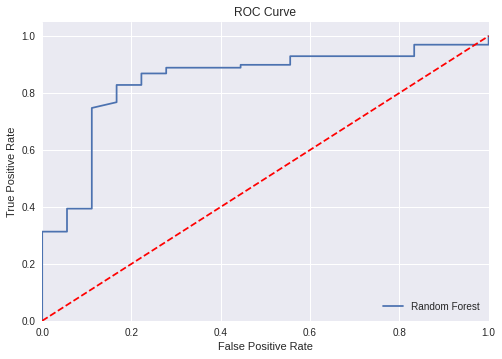

AUC: 0.84343
F1 Score: 0.91


In [136]:
# Best random search parameters 
print("-----Best random search parameters-----")
print(rf_random.best_params_)
best_random = rf_random.best_estimator_

y_pred = best_random.predict(x_test)
y_prob = best_random.predict_proba(x_test)[:,1]

print("\n-----Classification Report-----")
print(classification_report(y_test.values.ravel(), y_pred))


print ("\n-----Feature Importance-----")
feature_imp = pd.Series(best_random.feature_importances_,index=x.columns).sort_values(ascending=False)
print(feature_imp.head(n=30))

print("\n-----Accuracy-----")
print(accuracy_score(y_test.values.ravel(), y_pred))

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Random Forest ROC')
plt.show()
print ( 'AUC: ' + str(round(metrics.auc(fpr,tpr),5)))
print('F1 Score: ' + str(round(f1_score(y_test.values.ravel(), y_pred),5)))

In [137]:
x_test.head()

,f_II__abs_energy,f_II__absolute_sum_of_changes,f_II__agg_autocorrelation__f_agg_mean__maxlag_40,f_II__agg_autocorrelation__f_agg_median__maxlag_40,f_II__agg_autocorrelation__f_agg_var__maxlag_40,f_II__ar_coefficient__k_10__coeff_0,f_II__ar_coefficient__k_10__coeff_1,f_II__ar_coefficient__k_10__coeff_2,f_II__ar_coefficient__k_10__coeff_3,f_II__ar_coefficient__k_10__coeff_4,f_II__autocorrelation__lag_0,f_II__autocorrelation__lag_1,f_II__autocorrelation__lag_2,f_II__autocorrelation__lag_3,f_II__autocorrelation__lag_4,f_II__autocorrelation__lag_5,f_II__autocorrelation__lag_6,f_II__autocorrelation__lag_7,f_II__autocorrelation__lag_8,f_II__autocorrelation__lag_9,f_II__binned_entropy__max_bins_10,f_II__count_above_mean,f_II__count_below_mean,f_II__fft_aggregated__aggtype_centroid,f_II__fft_aggregated__aggtype_kurtosis,f_II__fft_aggregated__aggtype_skew,f_II__fft_aggregated__aggtype_variance,f_II__first_location_of_maximum,f_II__first_location_of_minimum,f_II__kurtosis,f_II__large_standard_deviation__r_0.05,f_II__large_standard_deviation__r_0.1,f_II__large_standard_deviation__r_0.15000000000000002,f_II__large_standard_deviation__r_0.2,f_II__large_standard_deviation__r_0.25,f_II__large_standard_deviation__r_0.30000000000000004,f_II__large_standard_deviation__r_0.35000000000000003,f_II__large_standard_deviation__r_0.4,f_II__large_standard_deviation__r_0.45,f_II__large_standard_deviation__r_0.5,f_II__large_standard_deviation__r_0.55,f_II__large_standard_deviation__r_0.6000000000000001,f_II__large_standard_deviation__r_0.65,f_II__large_standard_deviation__r_0.7000000000000001,f_II__large_standard_deviation__r_0.75,f_II__large_standard_deviation__r_0.8,f_II__large_standard_deviation__r_0.8500000000000001,f_II__large_standard_deviation__r_0.9,f_II__large_standard_deviation__r_0.9500000000000001,f_II__length,f_II__linear_trend__attr_intercept,f_II__linear_trend__attr_pvalue,f_II__linear_trend__attr_rvalue,f_II__linear_trend__attr_slope,f_II__linear_trend__attr_stderr,f_II__longest_strike_above_mean,f_II__longest_strike_below_mean,f_II__max_langevin_fixed_point__m_3__r_30,f_II__maximum,f_II__mean,f_II__median,f_II__minimum,f_II__quantile__q_0.1,f_II__quantile__q_0.2,f_II__quantile__q_0.3,f_II__quantile__q_0.4,f_II__quantile__q_0.6,f_II__quantile__q_0.7,f_II__quantile__q_0.8,f_II__quantile__q_0.9,f_II__skewness,f_II__standard_deviation,f_II__variance,f_PLETH__abs_energy,f_PLETH__absolute_sum_of_changes,f_PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_median__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_var__maxlag_40,f_PLETH__ar_coefficient__k_10__coeff_0,f_PLETH__ar_coefficient__k_10__coeff_1,f_PLETH__ar_coefficient__k_10__coeff_2,f_PLETH__ar_coefficient__k_10__coeff_3,f_PLETH__ar_coefficient__k_10__coeff_4,f_PLETH__autocorrelation__lag_0,f_PLETH__autocorrelation__lag_1,f_PLETH__autocorrelation__lag_2,f_PLETH__autocorrelation__lag_3,f_PLETH__autocorrelation__lag_4,f_PLETH__autocorrelation__lag_5,f_PLETH__autocorrelation__lag_6,f_PLETH__autocorrelation__lag_7,f_PLETH__autocorrelation__lag_8,f_PLETH__autocorrelation__lag_9,f_PLETH__binned_entropy__max_bins_10,f_PLETH__count_above_mean,f_PLETH__count_below_mean,f_PLETH__fft_aggregated__aggtype_centroid,f_PLETH__fft_aggregated__aggtype_kurtosis,f_PLETH__fft_aggregated__aggtype_skew,f_PLETH__fft_aggregated__aggtype_variance,f_PLETH__first_location_of_maximum,f_PLETH__first_location_of_minimum,f_PLETH__kurtosis,f_PLETH__large_standard_deviation__r_0.05,f_PLETH__large_standard_deviation__r_0.1,f_PLETH__large_standard_deviation__r_0.15000000000000002,f_PLETH__large_standard_deviation__r_0.2,f_PLETH__large_standard_deviation__r_0.25,f_PLETH__large_standard_deviation__r_0.30000000000000004,f_PLETH__large_standard_deviation__r_0.35000000000000003,f_PLETH__large_standard_deviation__r_0.4,f_PLETH__large_standard_deviation__r_0.45,f_PLETH__large_standard_deviation__r_0.5,f_PLETH__large_standard_deviation__r_0.55,f_PLETH__large_standard_deviation__r_0.600000000000000

In [143]:
import shap
explainer = shap.TreeExplainer(best_random)
shap_values = explainer.shap_values(x_train)[1]

In [145]:
shap_values.shape

(271, 274)

In [132]:
shap_values_arr = np.asarray(shap_values)
shap_values_arr = shap_values_arr.reshape(shap_values_arr.shape[0]*shap_values_arr.shape[1], shap_values_arr.shape[2])

In [128]:
x_test

array([[ 4.73069865e+00, -4.73070187e+00,  4.73070145e+00, ...,
        -4.06607065e-02, -8.66445054e-02, -1.37331486e-01],
       [ 3.94554901e-02, -3.94544987e-02,  3.94541814e-02, ...,
         4.47857234e-01,  4.12290304e-01,  3.61426210e-01],
       [ 3.94529851e-02, -3.94531973e-02,  3.94541854e-02, ...,
        -4.06607065e-02,  2.21521112e-01,  4.78780963e-01],
       ...,
       [ 3.94530445e-02, -3.94579332e-02,  3.94541828e-02, ...,
         4.55483420e-02,  1.40281396e-03, -4.93154219e-02],
       [ 3.94528234e-02, -3.94529029e-02,  3.94541817e-02, ...,
        -1.67863263e+00, -1.75954357e+00, -1.80963670e+00],
       [ 3.94559495e-02, -3.94565601e-02,  3.94541818e-02, ...,
        -2.99287852e-01, -3.50786464e-01, -4.01379678e-01]])

In [147]:
dct = {
  'f_DIASBP.COUNT':'DIASBP frequency',
    'f_SYSBP.MIN':'SYSBP - minimum',
    'f_MEANBP.MIN':'BP - minimum',
    'f_MEANBP':'BP - t0',
    'f_HEART_RATE.COUNT':'HEART_RATE frequency',
    'f_SYSBP.COUNT': 'SYSBP frequency',
    'f_RESPRATE.COUNT': 'RESPRATE frequency',
    'f_MEANBP.MEAN': 'BP - mean',
    'f_MEANBP.75.': 'BP - 75th %tile',
    'f_SPO2.COUNT': 'SPO2 frequency',
    'f_SYSBP': 'SYSBP - t0',
    'f_II__ar_coefficient__k_10__coeff_3':'EKG-2 autoregressive k-10 3rd coeff',
    'f_PLETH__autocorrelation__lag_8': 'PPG autocorrelation lag 8',
    'f_MEANBP.25.' : 'BP - 25th %tile',
    'f_PLETH__quantile__q_0.7': 'PPG 70th quantile',
    'f_MEANBP.COUNT': 'BP - frequency',
    'f_DIASBP.MAX': 'DIASBP - maximum',
    'f_II__ar_coefficient__k_10__coeff_2': 'EKG-2 autogressive k-10 2nd coeff',
    'f_II__autocorrelation__lag_2': 'EKG-2 autocorrelation lag 2',
    'f_V__autocorrelation__lag_2': 'EKG-5 autocorrelation lag 2'
}
x_shap = x_train.copy()
x_shap.rename(columns=dct, inplace=True)

In [148]:
x_shap.head()

,f_II__abs_energy,f_II__absolute_sum_of_changes,f_II__agg_autocorrelation__f_agg_mean__maxlag_40,f_II__agg_autocorrelation__f_agg_median__maxlag_40,f_II__agg_autocorrelation__f_agg_var__maxlag_40,f_II__ar_coefficient__k_10__coeff_0,f_II__ar_coefficient__k_10__coeff_1,EKG-2 autogressive k-10 2nd coeff,EKG-2 autoregressive k-10 3rd coeff,f_II__ar_coefficient__k_10__coeff_4,f_II__autocorrelation__lag_0,f_II__autocorrelation__lag_1,EKG-2 autocorrelation lag 2,f_II__autocorrelation__lag_3,f_II__autocorrelation__lag_4,f_II__autocorrelation__lag_5,f_II__autocorrelation__lag_6,f_II__autocorrelation__lag_7,f_II__autocorrelation__lag_8,f_II__autocorrelation__lag_9,f_II__binned_entropy__max_bins_10,f_II__count_above_mean,f_II__count_below_mean,f_II__fft_aggregated__aggtype_centroid,f_II__fft_aggregated__aggtype_kurtosis,f_II__fft_aggregated__aggtype_skew,f_II__fft_aggregated__aggtype_variance,f_II__first_location_of_maximum,f_II__first_location_of_minimum,f_II__kurtosis,f_II__large_standard_deviation__r_0.05,f_II__large_standard_deviation__r_0.1,f_II__large_standard_deviation__r_0.15000000000000002,f_II__large_standard_deviation__r_0.2,f_II__large_standard_deviation__r_0.25,f_II__large_standard_deviation__r_0.30000000000000004,f_II__large_standard_deviation__r_0.35000000000000003,f_II__large_standard_deviation__r_0.4,f_II__large_standard_deviation__r_0.45,f_II__large_standard_deviation__r_0.5,f_II__large_standard_deviation__r_0.55,f_II__large_standard_deviation__r_0.6000000000000001,f_II__large_standard_deviation__r_0.65,f_II__large_standard_deviation__r_0.7000000000000001,f_II__large_standard_deviation__r_0.75,f_II__large_standard_deviation__r_0.8,f_II__large_standard_deviation__r_0.8500000000000001,f_II__large_standard_deviation__r_0.9,f_II__large_standard_deviation__r_0.9500000000000001,f_II__length,f_II__linear_trend__attr_intercept,f_II__linear_trend__attr_pvalue,f_II__linear_trend__attr_rvalue,f_II__linear_trend__attr_slope,f_II__linear_trend__attr_stderr,f_II__longest_strike_above_mean,f_II__longest_strike_below_mean,f_II__max_langevin_fixed_point__m_3__r_30,f_II__maximum,f_II__mean,f_II__median,f_II__minimum,f_II__quantile__q_0.1,f_II__quantile__q_0.2,f_II__quantile__q_0.3,f_II__quantile__q_0.4,f_II__quantile__q_0.6,f_II__quantile__q_0.7,f_II__quantile__q_0.8,f_II__quantile__q_0.9,f_II__skewness,f_II__standard_deviation,f_II__variance,f_PLETH__abs_energy,f_PLETH__absolute_sum_of_changes,f_PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_median__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_var__maxlag_40,f_PLETH__ar_coefficient__k_10__coeff_0,f_PLETH__ar_coefficient__k_10__coeff_1,f_PLETH__ar_coefficient__k_10__coeff_2,f_PLETH__ar_coefficient__k_10__coeff_3,f_PLETH__ar_coefficient__k_10__coeff_4,f_PLETH__autocorrelation__lag_0,f_PLETH__autocorrelation__lag_1,f_PLETH__autocorrelation__lag_2,f_PLETH__autocorrelation__lag_3,f_PLETH__autocorrelation__lag_4,f_PLETH__autocorrelation__lag_5,f_PLETH__autocorrelation__lag_6,f_PLETH__autocorrelation__lag_7,PPG autocorrelation lag 8,f_PLETH__autocorrelation__lag_9,f_PLETH__binned_entropy__max_bins_10,f_PLETH__count_above_mean,f_PLETH__count_below_mean,f_PLETH__fft_aggregated__aggtype_centroid,f_PLETH__fft_aggregated__aggtype_kurtosis,f_PLETH__fft_aggregated__aggtype_skew,f_PLETH__fft_aggregated__aggtype_variance,f_PLETH__first_location_of_maximum,f_PLETH__first_location_of_minimum,f_PLETH__kurtosis,f_PLETH__large_standard_deviation__r_0.05,f_PLETH__large_standard_deviation__r_0.1,f_PLETH__large_standard_deviation__r_0.15000000000000002,f_PLETH__large_standard_deviation__r_0.2,f_PLETH__large_standard_deviation__r_0.25,f_PLETH__large_standard_deviation__r_0.30000000000000004,f_PLETH__large_standard_deviation__r_0.35000000000000003,f_PLETH__large_standard_deviation__r_0.4,f_PLETH__large_standard_deviation__r_0.45,f_PLETH__large_standard_deviation__r_0.5,f_PLETH__large_standard_deviation__r_0.55,f_PLETH__large_standard_deviation__r_0.6000000000000001,f_PLETH

In [168]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    nw_list = list(dct.values())
    for i in nw_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(nw_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    fig = ax.get_figure()
    fig.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/feature_importance.pdf", bbox_inches='tight')

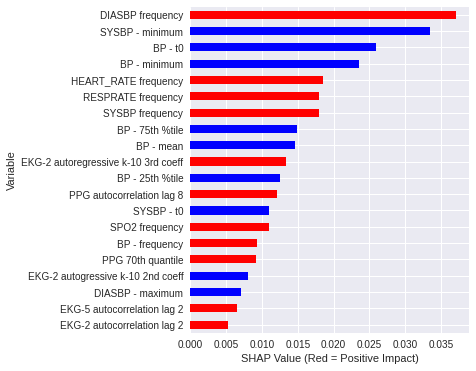

In [169]:
ABS_SHAP(shap_values, x_shap)
# ABS_SHAP(shap_values, x_shap).savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/feature_importance.pdf", bbox_inches='tight', dpi=600)

No handles with labels found to put in legend.


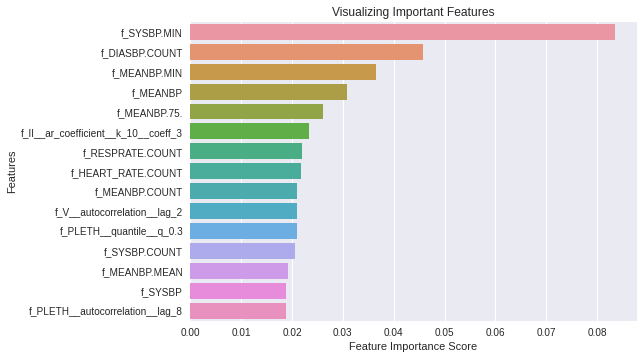

In [29]:
# Creating a bar plot for top 15 important features 
f = plt.figure()
sns.barplot(x=feature_imp.head(n=15), y=feature_imp.head(n=15).index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
f.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/feature_importance.pdf", bbox_inches='tight')
plt.show()

## Plot Learning Curve

In [37]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(clf, x_train, y_train, model_name):
    ''' Plot the learning curve of a given classifier.
    '''
    cv = 5
    y_train = np.array(y_train).reshape(y_train.size)
    n_samples = y_train.size *(1-1/cv)
    plot_per_k_samples = 10  # plot once every k samples
    train_sizes = np.linspace(0.1,1,30)
    
    
    train_sizes, train_scores, validation_scores = learning_curve(
            estimator = clf,
            X = x_train, y = y_train, 
            train_sizes = train_sizes, 
            cv = 5)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning Curves for a {} Model'.format(model_name), fontsize = 18, y = 1.03)
    plt.legend()
#     plt.ylim(0,1.05)   
    
    return None

## SVC Learning Curve

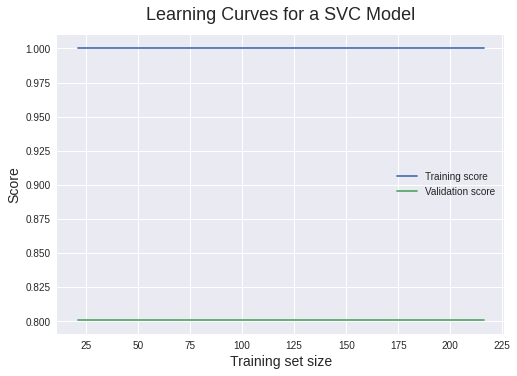

In [38]:
from sklearn.svm import SVC
elf_svc= SVC(kernel = 'rbf', 
             gamma = 0.01, 
             degree = 1, 
             decision_function_shape = 'ovo', 
             coef0 = 3.05, 
             C = 10)
plot_learning_curve(elf_svc, x_train, y_train, model_name='SVC')

## Random Forest Learning Curve

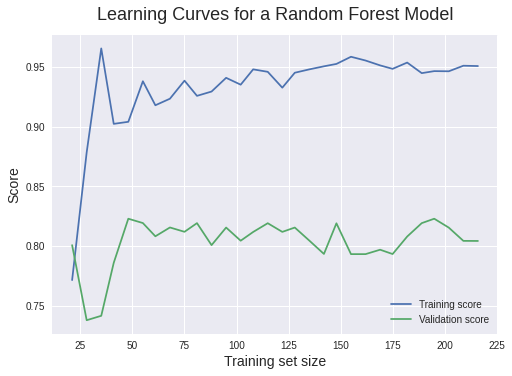

In [39]:
rf = RandomForestClassifier(random_state=49, 
                            n_estimators=15, 
                            min_samples_split=2, 
                            min_samples_leaf=6, 
                            max_depth=7, 
                            criterion='entropy', 
                            bootstrap=True)
plot_learning_curve(rf, x_train, y_train,model_name='Random Forest')

# Lasso Logistic Regression

In [40]:
def build_and_evaluate(elf_in, x_train, y_train, x_test, y_test, x, f_columns, param):
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score, roc_curve
    from sklearn.model_selection import RandomizedSearchCV, KFold


    #print ("print x_train")
    #print (x_train)
    #y_train= y_train.ravel()
    #kf= KFold(n_splits= x_train.shape[0])
    elf_in = RandomizedSearchCV(elf_in, param_distributions= param, 
        cv= 10, n_iter= 100, random_state= RANDOM_STATE).fit(x_train, y_train)


    predictions= elf_in.predict(x_test)

    print ("accuracy: ", str(round(accuracy_score(y_test, predictions)*100, 2)), " %")
    try:
        prob= elf_in.predict_proba(x_test)[:, 1]
    except:
        prob= elf_in.predict(x_test)
    print (classification_report(y_test, predictions))

    print (confusion_matrix(y_test, predictions))
    print ("y_test: ")
    print (y_test.sum())
    print (str(len(y_test)))
    print ("done printing y test")

    print('Feature importances:')
    print('Class {} is considered the positive class by the classifier, class {} negative'.format(elf_in.classes_[1],elf_in.classes_[0]))

    print ("best params")
    print (elf_in.best_params_)
    
    return elf_in

In [41]:
from __future__ import print_function

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoCV, Lasso, RidgeCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn as sk
import pandas as pd
import numpy as np
pd.options.display.width = 200
from sklearn.model_selection import train_test_split
import random
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectFromModel

test_fraction = 0.3
RANDOM_STATE= 49
random.seed(8)
np.random.seed(8)

dfile = 'merged_file_f.csv'

print('Building and evaluating a model using dataset: {}'.format(dfile))
df = pd.read_csv(dfile)

t_column = [c for c in df.columns if c.startswith('t_')]
f_columns = [c for c in df.columns if c.startswith('f_')]


print('Dataset has {} rows and {} feature columns'.format(df.shape[0], len(f_columns)))

df = sk.utils.shuffle(df)
x= df[f_columns]
y= df[t_column]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= test_fraction, random_state= 1215)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)


lassocv= LassoCV(eps= 0.001, n_alphas= 10, cv= 10, fit_intercept= False,
    random_state= RANDOM_STATE).fit(x_train, y_train)
model= SelectFromModel(lassocv, prefit= True, threshold= -np.inf, max_features= 25)
feature_idx= model.get_support()
#print (feature_idx)
feature_name= x.columns[feature_idx]
print (feature_name)

# lasso_x_train= x_train
lasso_x_test= x_test

lasso_x_train= model.transform(x_train)
lasso_x_test= model.transform(x_test)
lasso_f_columns= feature_name

ridgecv= RidgeCV(alphas= [0.01, 0.1, 1, 10], cv= 10, fit_intercept= False).fit(x_train, y_train)
ridge_model= SelectFromModel(ridgecv, prefit= True, threshold= -np.inf, max_features= 25 )
ridge_feature_idx= ridge_model.get_support()
#print (feature_idx)
ridge_feature_name= x.columns[ridge_feature_idx]
print (feature_name)

ridge_x_train= x_train
ridge_x_test= x_test

ridge_x_train= model.transform(x_train)
ridge_x_test= model.transform(x_test)
ridge_f_columns= feature_name

elf_lr= LogisticRegression(max_iter= 5000, 
                            solver= "liblinear")
param_lr= {"C": [0.01, 0.1, 1, 10]}

clf_aaa = build_and_evaluate(elf_in= elf_lr, 
                             x_train= lasso_x_train, y_train= y_train,
                             x_test=  lasso_x_test, y_test= y_test, 
                             x= x, f_columns= lasso_f_columns, param= param_lr)
print ("Done Printing LassoCV LR\n")

Building and evaluating a model using dataset: merged_file_f.csv
Dataset has 388 rows and 274 feature columns
Index(['f_II__abs_energy', 'f_II__absolute_sum_of_changes', 'f_II__agg_autocorrelation__f_agg_mean__maxlag_40', 'f_II__agg_autocorrelation__f_agg_median__maxlag_40',
       'f_II__agg_autocorrelation__f_agg_var__maxlag_40', 'f_II__ar_coefficient__k_10__coeff_0', 'f_II__ar_coefficient__k_10__coeff_1', 'f_II__ar_coefficient__k_10__coeff_2',
       'f_II__ar_coefficient__k_10__coeff_3', 'f_II__ar_coefficient__k_10__coeff_4', 'f_II__autocorrelation__lag_0', 'f_II__autocorrelation__lag_1', 'f_II__autocorrelation__lag_2',
       'f_II__autocorrelation__lag_3', 'f_II__autocorrelation__lag_4', 'f_II__autocorrelation__lag_5', 'f_II__autocorrelation__lag_6', 'f_II__autocorrelation__lag_7', 'f_II__autocorrelation__lag_8',
       'f_II__autocorrelation__lag_9', 'f_II__binned_entropy__max_bins_10', 'f_HEART_RATE.COUNT', 'f_SYSBP.MIN', 'f_DIASBP.COUNT', 'f_MEANBP.MIN'],
      dtype='object')

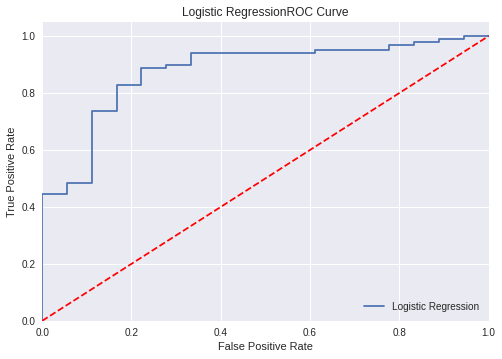

In [42]:
elf_lr= LogisticRegression(max_iter=5000, 
                               solver="liblinear",
                               C=1)
elf_lr.fit(lasso_x_train, y_train)
    
lg_y_pred = elf_lr.predict(lasso_x_test)
lg_y_prob = elf_lr.predict_proba(lasso_x_test)[:,1]
    

plt.figure()
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), lg_y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic RegressionROC Curve')
plt.legend(loc="lower right")        
plt.savefig('Logistic Regression ROC')
plt.show()

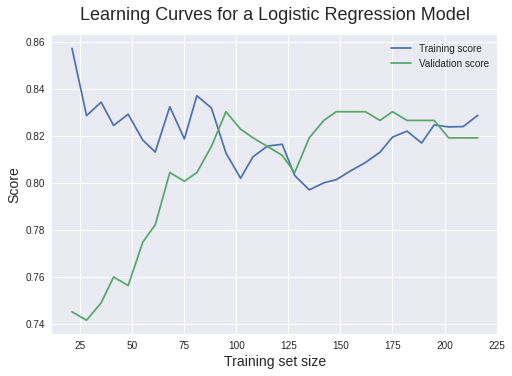

In [43]:
elf_lr= LogisticRegression(max_iter= 5000, 
                        solver= "liblinear",
                        C= 1)

plot_learning_curve(elf_lr, lasso_x_train, y_train, model_name='Logistic Regression')
plt.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/LR_Curve.pdf", bbox_inches='tight')
plt.savefig('Logistic Regression Learning Curve')

## Lesion Study

In [44]:
x,y,df = load_data('merged_file_f.csv')

In [45]:
def lasso_cv_x(x_train, x_test, y_train, y_test):
    
    # Split data into training and testing set
    # 70% training and 30% testing 
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state = 1215) 

    # Standard Scaling X
    from sklearn.preprocessing import StandardScaler
    sc= StandardScaler()
    x_train= sc.fit_transform(x_train)
    x_test= sc.fit_transform(x_test)

    RANDOM_STATE = 49
    # Get LassoCV of X
    lassocv= LassoCV(eps= 0.001, n_alphas= 10, cv= 10, fit_intercept= False,
        random_state= RANDOM_STATE).fit(x_train, y_train)
    model= SelectFromModel(lassocv, prefit= True, threshold= -np.inf, max_features= 25)
    
    feature_idx= model.get_support()
    feature_name= x.columns[feature_idx]

    lasso_x_train= model.transform(x_train)
    lasso_x_test= model.transform(x_test)
    lasso_f_columns= feature_name
    
    return lasso_x_train, lasso_x_test, lasso_f_columns

dummy
Index(['f_II__abs_energy', 'f_II__absolute_sum_of_changes', 'f_II__agg_autocorrelation__f_agg_mean__maxlag_40', 'f_II__agg_autocorrelation__f_agg_median__maxlag_40',
       'f_II__agg_autocorrelation__f_agg_var__maxlag_40', 'f_II__ar_coefficient__k_10__coeff_0', 'f_II__ar_coefficient__k_10__coeff_1', 'f_II__ar_coefficient__k_10__coeff_2',
       'f_II__ar_coefficient__k_10__coeff_3', 'f_II__ar_coefficient__k_10__coeff_4', 'f_II__autocorrelation__lag_0', 'f_II__autocorrelation__lag_1', 'f_II__autocorrelation__lag_2',
       'f_II__autocorrelation__lag_3', 'f_II__autocorrelation__lag_4', 'f_II__autocorrelation__lag_5', 'f_II__autocorrelation__lag_6', 'f_II__autocorrelation__lag_7', 'f_II__autocorrelation__lag_8',
       'f_II__autocorrelation__lag_9', 'f_II__binned_entropy__max_bins_10', 'f_HEART_RATE.COUNT', 'f_SYSBP.MIN', 'f_DIASBP.COUNT', 'f_MEANBP.MIN'],
      dtype='object')
all features
f_II
Index(['f_PLETH__abs_energy', 'f_PLETH__absolute_sum_of_changes', 'f_PLETH__agg_autoc

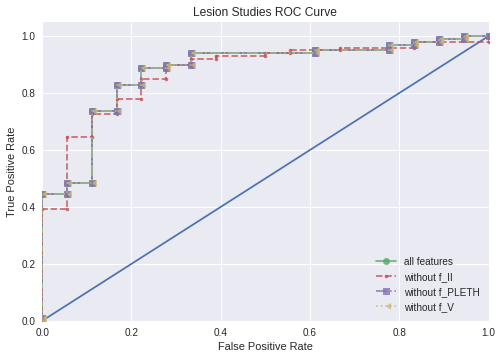

In [46]:
plt.figure()
plt.title('Lesion Studies ROC Curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

lesions = ['dummy', 'f_II', 'f_PLETH','f_V']
markers = ["o",".","s",4]
lines = ['-','--','-.',':']

for i in range(len(lesions)):
    print('===============================')
    print(lesions[i]) 
    x= df[f_columns]
    y= df[t_column]

    columns = [c for c in x.columns if not c.startswith(lesions[i])]
    
    x = x[columns]
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state = 1215) 
    
    
    lasso_x_train, lasso_x_test, lasso_f_columns = lasso_cv_x(x_train, x_test, y_train, y_test)
    
    #print(columns)
    #print('------------------------------------------')
    print(lasso_f_columns)
    
    elf_lr= LogisticRegression(max_iter=5000, 
                               solver="liblinear",
                               C=1)
    elf_lr.fit(lasso_x_train, y_train)
    
    y_pred = elf_lr.predict(lasso_x_test)
    y_prob = elf_lr.predict_proba(lasso_x_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_prob)

    if lesions[i] == 'dummy':
        label = 'all features'
    else:
        label='without {}'.format(lesions[i])
    print(label)  
    
    plt.plot(fpr, tpr, label=label, marker = markers[i], alpha = 0.8, linestyle = lines[i])


plt.legend(loc="lower right")
plt.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/Lesion_Studies_ROC.pdf", bbox_inches='tight')

plt.show()

In [47]:
[c for c in x_train.columns if 
     (not c.startswith('f_II')) and 
     (not c.startswith('f_PLETH')) and
     (not c.startswith('f_V'))
]

['f_AGE',
 'f_IS_MALE',
 'f_RACE_WHITE',
 'f_RACE_BLACK',
 'f_RACE_HISPANIC',
 'f_METASTATIC_CANCER',
 'f_DIABETES',
 'f_HEART_RATE',
 'f_SYSBP',
 'f_DIASBP',
 'f_MEANBP',
 'f_RESPRATE',
 'f_SPO2',
 'f_HEART_RATE.COUNT',
 'f_HEART_RATE.MEAN',
 'f_HEART_RATE.MIN',
 'f_HEART_RATE.25.',
 'f_HEART_RATE.50.',
 'f_HEART_RATE.75.',
 'f_HEART_RATE.MAX',
 'f_SYSBP.COUNT',
 'f_SYSBP.MEAN',
 'f_SYSBP.MIN',
 'f_SYSBP.25.',
 'f_SYSBP.50.',
 'f_SYSBP.75.',
 'f_SYSBP.MAX',
 'f_DIASBP.COUNT',
 'f_DIASBP.MEAN',
 'f_DIASBP.MIN',
 'f_DIASBP.25.',
 'f_DIASBP.50.',
 'f_DIASBP.75.',
 'f_DIASBP.MAX',
 'f_MEANBP.COUNT',
 'f_MEANBP.MEAN',
 'f_MEANBP.MIN',
 'f_MEANBP.25.',
 'f_MEANBP.50.',
 'f_MEANBP.75.',
 'f_MEANBP.MAX',
 'f_RESPRATE.COUNT',
 'f_RESPRATE.MEAN',
 'f_RESPRATE.MIN',
 'f_RESPRATE.25.',
 'f_RESPRATE.50.',
 'f_RESPRATE.75.',
 'f_RESPRATE.MAX',
 'f_SPO2.COUNT',
 'f_SPO2.MEAN',
 'f_SPO2.MIN',
 'f_SPO2.25.',
 'f_SPO2.50.',
 'f_SPO2.75.',
 'f_SPO2.MAX']

# XGBoost

In [48]:
x,y,df = load_data('merged_file_f.csv')

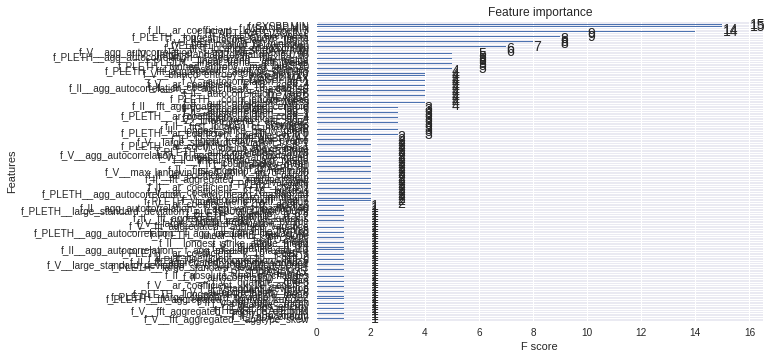

In [49]:
# Use XGBoost
def xgboost_train(X,Y):
    from xgboost import XGBClassifier
    from xgboost import plot_importance
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from sklearn.metrics import accuracy_score

    # splitting data in test train 
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=1215)
    
    # creating model 
    model = XGBClassifier(random_state = 49)
    
    # fitting model 
    model.fit(X_train,Y_train)
     
    #plot feature importance
    plot_importance(model)
    plt.show()

    return model, X_train, X_test, Y_train, Y_test

xg_rf, xg_x_train, xg_x_test, xg_y_train, xg_y_test = xgboost_train(x,y.values.ravel())


-----Classification Report-----
              precision    recall  f1-score   support

           0       0.50      0.28      0.36        18
           1       0.88      0.95      0.91        99

    accuracy                           0.85       117
   macro avg       0.69      0.61      0.63       117
weighted avg       0.82      0.85      0.83       117


-----Feature Importance-----
f_II__maximum                             0.069556
f_HEART_RATE.COUNT                        0.045598
f_V__fft_aggregated__aggtype_centroid     0.039989
f_MEANBP                                  0.033697
f_V__autocorrelation__lag_7               0.032442
f_II__autocorrelation__lag_3              0.028181
f_V__ar_coefficient__k_10__coeff_1        0.027769
f_MEANBP.MIN                              0.027544
f_II__fft_aggregated__aggtype_centroid    0.023644
f_SYSBP                                   0.022936
dtype: float32

-----Accuracy-----
0.8461538461538461


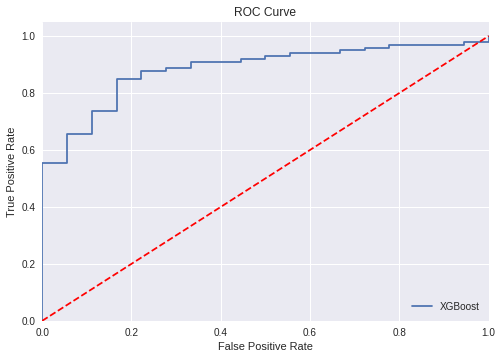

AUC: 0.88384
F1 Score: 0.91262


In [50]:
	xg_y_pred = xg_rf.predict(xg_x_test)
	xg_y_prob = xg_rf.predict_proba(xg_x_test)[:,1]

	print("\n-----Classification Report-----")
	print(classification_report(xg_y_test, xg_y_pred))

	print ("\n-----Feature Importance-----")
	xg_feature_imp = pd.Series(xg_rf.feature_importances_,index=x.columns).sort_values(ascending=False)
	print(xg_feature_imp.head(n=10))

	print("\n-----Accuracy-----")
	print(accuracy_score(xg_y_test, xg_y_pred))

	fpr, tpr, thresholds = roc_curve(xg_y_test, xg_y_prob)
	plt.figure()
	plt.plot(fpr, tpr, label='XGBoost')
	plt.plot([0, 1], [0, 1],'r--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('ROC Curve')
	plt.legend(loc="lower right")
	plt.savefig('XG Boost ROC')
	plt.show()
	print ( 'AUC: ' + str(round(metrics.auc(fpr,tpr),5)))
	print('F1 Score: ' + str(round(f1_score(xg_y_test, xg_y_pred),5)))

# ALL Models w/ ROC Curve
## Logistic Regression, Lasso Logistic Regression, Linear SUC, Random Forest, xgBoost

In [44]:
import matplotlib.pyplot as plt


<Figure size 576x396 with 0 Axes>

Dataset has 388 rows and 274 feature columns


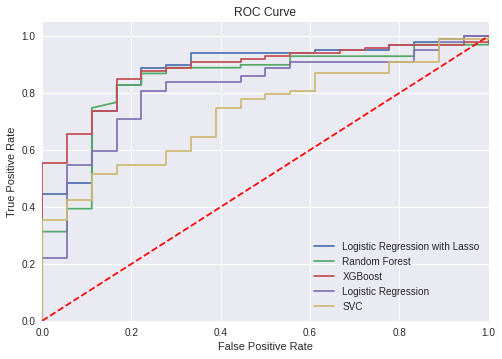

In [46]:
# Logistic Regression
figg = plt.figure()
RANDOM_BANG = 1215
elf_lr= LogisticRegression(max_iter=5000, 
                           solver="liblinear",
                           C=1,
                           random_state = RANDOM_BANG)
elf_lr.fit(lasso_x_train, y_train) 
lg_y_pred = elf_lr.predict(lasso_x_test)
lg_y_prob = elf_lr.predict_proba(lasso_x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), lg_y_prob)
plt.plot(fpr, tpr, label='Logistic Regression with Lasso')      


# Random Foreest 
# reload dataset because we don't use LASSO for random forest
from rf import load_data
x,y,df = load_data('merged_file_f.csv')
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, 
                                                   random_state = RANDOM_BANG)

best_random = rf_random.best_estimator_
rf_y_pred = best_random.predict(x_test)
rf_y_prob = best_random.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), rf_y_prob)
plt.plot(fpr, tpr, label='Random Forest')

# XGBoost
xg_y_pred = xg_rf.predict(xg_x_test)
xg_y_prob = xg_rf.predict_proba(xg_x_test)[:,1]

fpr, tpr, thresholds = roc_curve(xg_y_test, xg_y_prob)
plt.plot(fpr, tpr, label='XGBoost')


# Simply Logistic Regression , c= 0.1
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

elf_simply_lr = LogisticRegression(solver= "liblinear",
                                   max_iter= 5000, 
                                   C = 0.1,
                                   random_state = RANDOM_BANG)
elf_simply_lr.fit(x_train, y_train)
lr_y_pred = elf_simply_lr.predict(x_test)
lr_y_prob = elf_simply_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), lr_y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')


# SVC, best params: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'decision_function_shape': 'ovo', 'coef0': 3.0500000000000003, 'C': 10}
elf_svc= SVC(kernel = 'rbf', 
             gamma = 0.01, 
             degree = 1, 
             decision_function_shape = 'ovo', 
             coef0 = 3.05, 
             C = 10,
            probability = True)
elf_svc.fit(x_train, y_train)
svc_y_pred = elf_svc.predict(x_test)
svc_y_prob = elf_svc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), svc_y_prob)
plt.plot(fpr, tpr, label='SVC')


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")  
figg.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/ROC_pdf.pdf", bbox_inches='tight')
plt.show()

In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Dataset has 388 rows and 274 feature columns


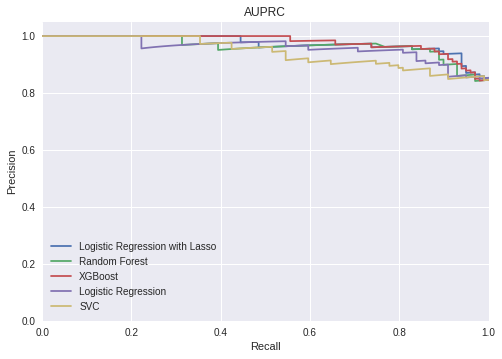

In [59]:
figg = plt.figure()
RANDOM_BANG = 1215
elf_lr= LogisticRegression(max_iter=5000, 
                           solver="liblinear",
                           C=1,
                           random_state = RANDOM_BANG)
elf_lr.fit(lasso_x_train, y_train) 
lg_y_pred = elf_lr.predict(lasso_x_test)
lg_y_prob = elf_lr.predict_proba(lasso_x_test)[:,1]
pr, rec, thresholds = precision_recall_curve(y_test.values.ravel(), lg_y_prob)
plt.plot(rec, pr, label='Logistic Regression with Lasso')      


# Random Foreest 
# reload dataset because we don't use LASSO for random forest
from rf import load_data
x,y,df = load_data('merged_file_f.csv')
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, 
                                                   random_state = RANDOM_BANG)

best_random = rf_random.best_estimator_
rf_y_pred = best_random.predict(x_test)
rf_y_prob = best_random.predict_proba(x_test)[:,1]

pr, rec, thresholds = precision_recall_curve(y_test.values.ravel(), rf_y_prob)
plt.plot(rec, pr, label='Random Forest')

# XGBoost
xg_y_pred = xg_rf.predict(xg_x_test)
xg_y_prob = xg_rf.predict_proba(xg_x_test)[:,1]

pr, rec, thresholds = precision_recall_curve(xg_y_test, xg_y_prob)
plt.plot(rec, pr, label='XGBoost')


# Simply Logistic Regression , c= 0.1
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

elf_simply_lr = LogisticRegression(solver= "liblinear",
                                   max_iter= 5000, 
                                   C = 0.1,
                                   random_state = RANDOM_BANG)
elf_simply_lr.fit(x_train, y_train)
lr_y_pred = elf_simply_lr.predict(x_test)
lr_y_prob = elf_simply_lr.predict_proba(x_test)[:,1]
pr, rec, thresholds = precision_recall_curve(y_test.values.ravel(), lr_y_prob)
plt.plot(rec, pr, label='Logistic Regression')


# SVC, best params: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'decision_function_shape': 'ovo', 'coef0': 3.0500000000000003, 'C': 10}
elf_svc= SVC(kernel = 'rbf', 
             gamma = 0.01, 
             degree = 1, 
             decision_function_shape = 'ovo', 
             coef0 = 3.05, 
             C = 10,
            probability = True)
elf_svc.fit(x_train, y_train)
svc_y_pred = elf_svc.predict(x_test)
svc_y_prob = elf_svc.predict_proba(x_test)[:,1]
pr, rec, thresholds = precision_recall_curve(y_test.values.ravel(), svc_y_prob)
plt.plot(rec, pr, label='SVC')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC')
plt.legend()  
figg.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/AUPRC_pdf.pdf", bbox_inches='tight')
plt.show()

In [51]:
from sklearn.calibration import calibration_curve

Dataset has 388 rows and 274 feature columns


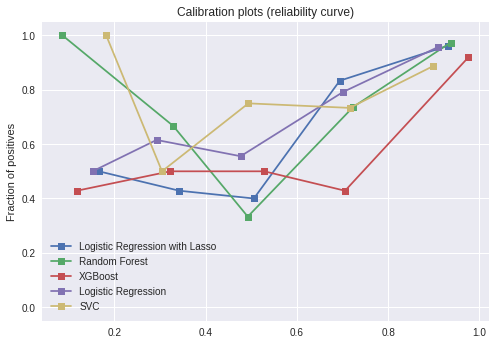

In [52]:
figg = plt.figure()
RANDOM_BANG = 1215
elf_lr= LogisticRegression(max_iter=5000, 
                           solver="liblinear",
                           C=1,
                           random_state = RANDOM_BANG)
elf_lr.fit(lasso_x_train, y_train) 
lg_y_pred = elf_lr.predict(lasso_x_test)
lg_y_prob = elf_lr.predict_proba(lasso_x_test)[:,1]
pos, val = calibration_curve(y_test.values, lg_y_prob)
plt.plot(val, pos,"s-", label='Logistic Regression with Lasso')      


# Random Foreest 
# reload dataset because we don't use LASSO for random forest
from rf import load_data
x,y,df = load_data('merged_file_f.csv')
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, 
                                                   random_state = RANDOM_BANG)

best_random = rf_random.best_estimator_
rf_y_pred = best_random.predict(x_test)
rf_y_prob = best_random.predict_proba(x_test)[:,1]

pos, val = calibration_curve(y_test.values, rf_y_prob)
plt.plot(val, pos,"s-",  label='Random Forest') 


# XGBoost
xg_y_pred = xg_rf.predict(xg_x_test)
xg_y_prob = xg_rf.predict_proba(xg_x_test)[:,1]


pos, val = calibration_curve(xg_y_test, xg_y_prob)
plt.plot(val, pos, "s-", label='XGBoost')


# Simply Logistic Regression , c= 0.1
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

elf_simply_lr = LogisticRegression(solver= "liblinear",
                                   max_iter= 5000, 
                                   C = 0.1,
                                   random_state = RANDOM_BANG)
elf_simply_lr.fit(x_train, y_train)
lr_y_pred = elf_simply_lr.predict(x_test)
lr_y_prob = elf_simply_lr.predict_proba(x_test)[:,1]
pos, val = calibration_curve(y_test.values, lr_y_prob)
plt.plot(val, pos, "s-", label='Logistic Regression')


# SVC, best params: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'decision_function_shape': 'ovo', 'coef0': 3.0500000000000003, 'C': 10}
elf_svc= SVC(kernel = 'rbf', 
             gamma = 0.01, 
             degree = 1, 
             decision_function_shape = 'ovo', 
             coef0 = 3.05, 
             C = 10,
            probability = True)
elf_svc.fit(x_train, y_train)
svc_y_pred = elf_svc.predict(x_test)
svc_y_prob = elf_svc.predict_proba(x_test)[:,1]
pos, val = calibration_curve(y_test.values, svc_y_prob)
plt.plot(val, pos, "s-", label='SVC')

plt.ylim([-0.05, 1.05])
plt.ylabel('Fraction of positives')
plt.title('Calibration plots (reliability curve)')
plt.legend()  
figg.savefig("/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/calibration_pdf.pdf", bbox_inches='tight')
plt.show()

In [53]:
from sklearn.manifold import TSNE

In [55]:
tsne_df = x.copy()
tsne_df.head()

,f_II__abs_energy,f_II__absolute_sum_of_changes,f_II__agg_autocorrelation__f_agg_mean__maxlag_40,f_II__agg_autocorrelation__f_agg_median__maxlag_40,f_II__agg_autocorrelation__f_agg_var__maxlag_40,f_II__ar_coefficient__k_10__coeff_0,f_II__ar_coefficient__k_10__coeff_1,f_II__ar_coefficient__k_10__coeff_2,f_II__ar_coefficient__k_10__coeff_3,f_II__ar_coefficient__k_10__coeff_4,f_II__autocorrelation__lag_0,f_II__autocorrelation__lag_1,f_II__autocorrelation__lag_2,f_II__autocorrelation__lag_3,f_II__autocorrelation__lag_4,f_II__autocorrelation__lag_5,f_II__autocorrelation__lag_6,f_II__autocorrelation__lag_7,f_II__autocorrelation__lag_8,f_II__autocorrelation__lag_9,f_II__binned_entropy__max_bins_10,f_II__count_above_mean,f_II__count_below_mean,f_II__fft_aggregated__aggtype_centroid,f_II__fft_aggregated__aggtype_kurtosis,f_II__fft_aggregated__aggtype_skew,f_II__fft_aggregated__aggtype_variance,f_II__first_location_of_maximum,f_II__first_location_of_minimum,f_II__kurtosis,f_II__large_standard_deviation__r_0.05,f_II__large_standard_deviation__r_0.1,f_II__large_standard_deviation__r_0.15000000000000002,f_II__large_standard_deviation__r_0.2,f_II__large_standard_deviation__r_0.25,f_II__large_standard_deviation__r_0.30000000000000004,f_II__large_standard_deviation__r_0.35000000000000003,f_II__large_standard_deviation__r_0.4,f_II__large_standard_deviation__r_0.45,f_II__large_standard_deviation__r_0.5,f_II__large_standard_deviation__r_0.55,f_II__large_standard_deviation__r_0.6000000000000001,f_II__large_standard_deviation__r_0.65,f_II__large_standard_deviation__r_0.7000000000000001,f_II__large_standard_deviation__r_0.75,f_II__large_standard_deviation__r_0.8,f_II__large_standard_deviation__r_0.8500000000000001,f_II__large_standard_deviation__r_0.9,f_II__large_standard_deviation__r_0.9500000000000001,f_II__length,f_II__linear_trend__attr_intercept,f_II__linear_trend__attr_pvalue,f_II__linear_trend__attr_rvalue,f_II__linear_trend__attr_slope,f_II__linear_trend__attr_stderr,f_II__longest_strike_above_mean,f_II__longest_strike_below_mean,f_II__max_langevin_fixed_point__m_3__r_30,f_II__maximum,f_II__mean,f_II__median,f_II__minimum,f_II__quantile__q_0.1,f_II__quantile__q_0.2,f_II__quantile__q_0.3,f_II__quantile__q_0.4,f_II__quantile__q_0.6,f_II__quantile__q_0.7,f_II__quantile__q_0.8,f_II__quantile__q_0.9,f_II__skewness,f_II__standard_deviation,f_II__variance,f_PLETH__abs_energy,f_PLETH__absolute_sum_of_changes,f_PLETH__agg_autocorrelation__f_agg_mean__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_median__maxlag_40,f_PLETH__agg_autocorrelation__f_agg_var__maxlag_40,f_PLETH__ar_coefficient__k_10__coeff_0,f_PLETH__ar_coefficient__k_10__coeff_1,f_PLETH__ar_coefficient__k_10__coeff_2,f_PLETH__ar_coefficient__k_10__coeff_3,f_PLETH__ar_coefficient__k_10__coeff_4,f_PLETH__autocorrelation__lag_0,f_PLETH__autocorrelation__lag_1,f_PLETH__autocorrelation__lag_2,f_PLETH__autocorrelation__lag_3,f_PLETH__autocorrelation__lag_4,f_PLETH__autocorrelation__lag_5,f_PLETH__autocorrelation__lag_6,f_PLETH__autocorrelation__lag_7,f_PLETH__autocorrelation__lag_8,f_PLETH__autocorrelation__lag_9,f_PLETH__binned_entropy__max_bins_10,f_PLETH__count_above_mean,f_PLETH__count_below_mean,f_PLETH__fft_aggregated__aggtype_centroid,f_PLETH__fft_aggregated__aggtype_kurtosis,f_PLETH__fft_aggregated__aggtype_skew,f_PLETH__fft_aggregated__aggtype_variance,f_PLETH__first_location_of_maximum,f_PLETH__first_location_of_minimum,f_PLETH__kurtosis,f_PLETH__large_standard_deviation__r_0.05,f_PLETH__large_standard_deviation__r_0.1,f_PLETH__large_standard_deviation__r_0.15000000000000002,f_PLETH__large_standard_deviation__r_0.2,f_PLETH__large_standard_deviation__r_0.25,f_PLETH__large_standard_deviation__r_0.30000000000000004,f_PLETH__large_standard_deviation__r_0.35000000000000003,f_PLETH__large_standard_deviation__r_0.4,f_PLETH__large_standard_deviation__r_0.45,f_PLETH__large_standard_deviation__r_0.5,f_PLETH__large_standard_deviation__r_0.55,f_PLETH__large_standard_deviation__r_0.600000000000000

In [114]:
tsne_em = TSNE(n_components=2, perplexity=50, n_iter=15000, verbose=1).fit_transform(tsne_df)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 388 samples in 0.010s...
[t-SNE] Computed neighbors for 388 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 388 / 388
[t-SNE] Mean sigma: 2432966019.587880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.294334
[t-SNE] KL divergence after 1650 iterations: 0.239119


In [115]:
final_df = pd.concat([pd.DataFrame(tsne_em),y],axis=1)
final_df.head()

,0,1,t_VOLUMNE_RESPONSIVENESS
0,-8.345065,-4.640774,0
1,-9.090558,-6.697974,1
2,-19.341589,-19.700928,1
3,3.794062,2.766264,1
4,12.688022,9.076326,1


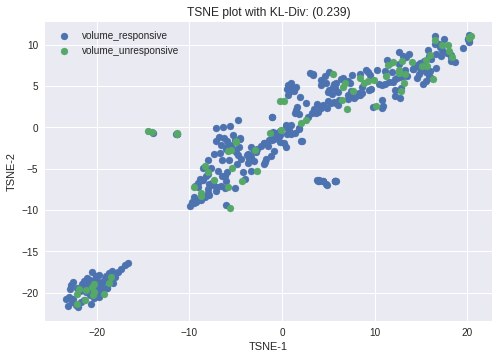

In [170]:
plt.scatter(final_df[final_df['t_VOLUMNE_RESPONSIVENESS']==1].iloc[:,0],final_df[final_df['t_VOLUMNE_RESPONSIVENESS']==1].iloc[:,1], label='volume_responsive')
plt.scatter(final_df[final_df['t_VOLUMNE_RESPONSIVENESS']==0].iloc[:,0],final_df[final_df['t_VOLUMNE_RESPONSIVENESS']==0].iloc[:,1], label='volume_unresponsive')
plt.legend()
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.title('TSNE plot with KL-Div: (0.239)')
plt.savefig('/home/parthshah412/Documents/CapstoneProject/New_Work/ImagesNew/tsne_pdf.pdf',bbox_inches='tight')